In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
raw=pd.read_csv('../input/rank-best-goalers/rank_of_players')
raw

,Unnamed: 0,Player,Shooting Percentage,Points per 60,Goal Contribution,Shot Contribution,Weighted Score,Goal<25%,Goal 25%-50%,Goal 50%-75%,Goal>75%,Shot<25%,Shot 25%-50%,Shot 50%-75%,Shot>75%
0,0,Leila Kilduff,3.119426,3.676815,2.800621,-0.011485,0.490408,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.600000,0.400000
1,1,Cailey Hutchison,8.466656,1.509115,1.087196,-1.227110,0.489796,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,2,Mikyla Grant-Mentis,0.615565,3.676815,2.229479,1.760768,0.373985,0.800000,0.200000,0.000000,0.000000,0.333333,0.309524,0.285714,0.071429
3,3,Autumn MacDougall,1.127321,1.942655,4.514045,0.561165,0.340438,1.000000,0.000000,0.000000,0.000000,0.647059,0.235294,0.117647,0.000000
4,4,Taylor Woods,0.492717,2.809735,1.658338,1.447265,0.298722,0.500000,0.250000,0.000000,0.250000,0.052632,0.157895,0.289474,0.500000
5,5,Lisa Chesson,1.337016,1.509115,3.371762,0.142175,0.293146,1.000000,0.000000,0.000000,0.000000,0.200000,0.600000,0.000000,0.200000
6,6,Katelynn Russ,0.329567,2.231682,2.372264,1.347155,0.272095,1.000000,0.000000,0.000000,0.000000,0.304348,0.391304,0.217391,0.086957
7,7,Brooke Boquist,0.267570,2.231682,1.554494,1.623943,0.246766,1.000000,0.000000,0.000000,0.000000,0.320000,0.440000,0.240000,0.000000
8,8,Emily Janiga,1.337016,1.509115,1.087196,-0.011485,0.237551,0.000000,0.000000,0.000000,1.000000,0.400000,0.000000,0.200000,0.400000
9,9,Samantha Davis,0.492717,1.818787,1.554494,0.600334,0.236084,0.500000,0.250000,0.250000,0.000000,0.368421,0.421053,0.157895,0.052632


## Clustering based on shots

<AxesSubplot:ylabel='Frequency'>

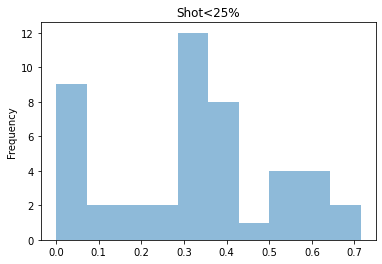

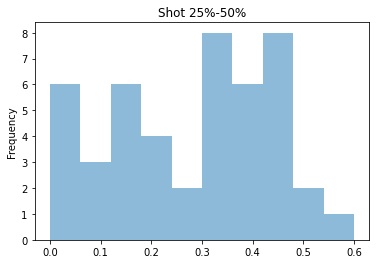

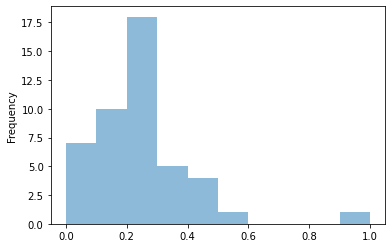

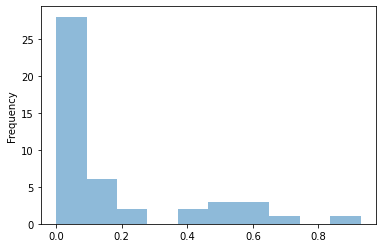

In [7]:
#plot the distribution of shots
plt.figure(1)
raw['Shot<25%'].plot(kind='hist',title='Shot<25%',alpha=0.5)

plt.figure(2)
raw['Shot 25%-50%'].plot(kind='hist',title='Shot 25%-50%',alpha=0.5)

plt.figure(3)
raw['Shot 50%-75%'].plot(kind='hist',alpha=0.5)

plt.figure(4)
raw['Shot>75%'].plot(kind='hist',alpha=0.5)

In [51]:
X=raw[['Shot<25%','Shot 25%-50%','Shot 50%-75%','Shot>75%']]

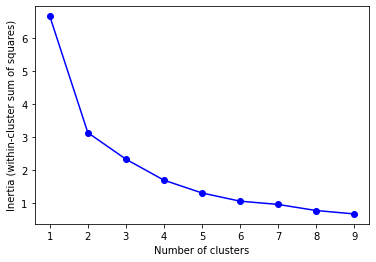

In [9]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

In [10]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.5436964519510077
For n_clusters= 3 The average silhouette_score is : 0.4187688855496718
For n_clusters= 4 The average silhouette_score is : 0.3883566279344692
For n_clusters= 5 The average silhouette_score is : 0.38488040468222035
For n_clusters= 6 The average silhouette_score is : 0.381460452272947
For n_clusters= 7 The average silhouette_score is : 0.36392662627890077
For n_clusters= 8 The average silhouette_score is : 0.3403323517114925
For n_clusters= 9 The average silhouette_score is : 0.3541781614968421
For n_clusters= 10 The average silhouette_score is : 0.33250727906575694


In [11]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=2 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=2 is 3.1402596400521388
cluster centers:  [[0.40155598 0.346123   0.20088322 0.0514378 ]
 [0.0756993  0.07345732 0.36130765 0.48953573]]
cluster labels:  [1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 1 1 1 0 0 0 0]


In [52]:
X.head()

,Shot<25%,Shot 25%-50%,Shot 50%-75%,Shot>75%
0,0.000000,0.000000,0.600000,0.400000
1,0.000000,0.000000,1.000000,0.000000
2,0.333333,0.309524,0.285714,0.071429
3,0.647059,0.235294,0.117647,0.000000
4,0.052632,0.157895,0.289474,0.500000


In [20]:
raw['Shot<50%'] = raw['Shot<25%'] + raw['Shot 25%-50%']
raw['Shot>50%'] = raw['Shot 50%-75%'] + raw['Shot>75%']
raw.head()

,Unnamed: 0,Player,Shooting Percentage,Points per 60,Goal Contribution,Shot Contribution,Weighted Score,Goal<25%,Goal 25%-50%,Goal 50%-75%,Goal>75%,Shot<25%,Shot 25%-50%,Shot 50%-75%,Shot>75%,Shot<50%,Shot>50%
0,0,Leila Kilduff,3.119426,3.676815,2.800621,-0.011485,0.490408,0.0,0.00,0.5,0.50,0.000000,0.000000,0.600000,0.400000,0.000000,1.000000
1,1,Cailey Hutchison,8.466656,1.509115,1.087196,-1.227110,0.489796,0.0,0.00,1.0,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
2,2,Mikyla Grant-Mentis,0.615565,3.676815,2.229479,1.760768,0.373985,0.8,0.20,0.0,0.00,0.333333,0.309524,0.285714,0.071429,0.642857,0.357143
3,3,Autumn MacDougall,1.127321,1.942655,4.514045,0.561165,0.340438,1.0,0.00,0.0,0.00,0.647059,0.235294,0.117647,0.000000,0.882353,0.117647
4,4,Taylor Woods,0.492717,2.809735,1.658338,1.447265,0.298722,0.5,0.25,0.0,0.25,0.052632,0.157895,0.289474,0.500000,0.210526,0.789474


In [70]:
import plotly.express as px
import random


kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
clusters = kmeans.predict(X)
print(clusters.shape)
raw['cluster'] = clusters
raw['cluster'] = raw.cluster.astype('category')

print(X.shape)

fig = px.scatter(raw, 
                 x=raw['Shot<50%'], 
                 y=raw['Shot>50%'], 
                 color=raw['cluster'], 
                 hover_data=['Player'])


fig.update_layout(
    height=1000,
    title_text='Players With 2 Clusters for Long and Shot Goalers'
)

#fig.savefig('./plots/QB_2D.png', bbox_inches='tight')
fig.show()

(46,)
(46, 4)


In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data = principalComponents
                      ,columns = ['pc1', 'pc2'])

labels = raw[['Player']]
pca_df = pd.concat([labels,pca_df],axis=1)

pca_df = pca_df.sort_values(by='pc1',ascending=True).reset_index()

pca_df.head(5)

,index,Player,pc1,pc2
0,11,Audra Richards,-0.327841,-0.105243
1,3,Autumn MacDougall,-0.315707,-0.085133
2,32,Amy Curlew,-0.310160,-0.075940
3,15,Jillian Dempsey,-0.304769,-0.073943
4,14,Kristin Lewicki,-0.299396,-0.159026


In [55]:
import matplotlib.pyplot as plt
import plotly.express as px
import random
from itertools import cycle
palette = cycle(px.colors.qualitative.Plotly)
palette = cycle(px.colors.sequential.PuBu)

X = pca_df[['pc1','pc2']].values

x = pca_df.pc1.values
y = pca_df.pc2.values
n = pca_df.Player.values

# clusters = DBSCAN(eps=0.6, min_samples=5).fit_predict(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
clusters = kmeans.predict(X)
print(clusters.shape)
pca_df['cluster'] = clusters
pca_df['cluster'] = pca_df.cluster.astype('category')

print(X.shape)

fig = px.scatter(pca_df, x=pca_df['pc1'], 
                 y=pca_df['pc2'], 
                 color=pca_df['cluster'], 
                 hover_data=['Player'], 
                 text=pca_df['Player'])

fig.update_layout(
    height=1000,
    title_text='2D PCA Viz of Players With  Six Clusters'
)

fig.update_traces(marker=dict(size=202,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

#fig.savefig('./plots/QB_2D.png', bbox_inches='tight')
fig.show()

(46,)
(46, 2)


#### Red(1) are long distance shooters and Blue(0) are short distance shooters

In [56]:
pca_df.head()

,index,Player,pc1,pc2,cluster
0,11,Audra Richards,-0.327841,-0.105243,0
1,3,Autumn MacDougall,-0.315707,-0.085133,0
2,32,Amy Curlew,-0.310160,-0.075940,0
3,15,Jillian Dempsey,-0.304769,-0.073943,0
4,14,Kristin Lewicki,-0.299396,-0.159026,0


In [72]:
pca_df.to_csv('Clustering_Shot_Distance.csv')

In [71]:
raw[raw['Player']=='Cailey Hutchison']

,Unnamed: 0,Player,Shooting Percentage,Points per 60,Goal Contribution,Shot Contribution,Weighted Score,Goal<25%,Goal 25%-50%,Goal 50%-75%,Goal>75%,Shot<25%,Shot 25%-50%,Shot 50%-75%,Shot>75%,Shot<50%,Shot>50%,cluster
1,1,Cailey Hutchison,8.466656,1.509115,1.087196,-1.22711,0.489796,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



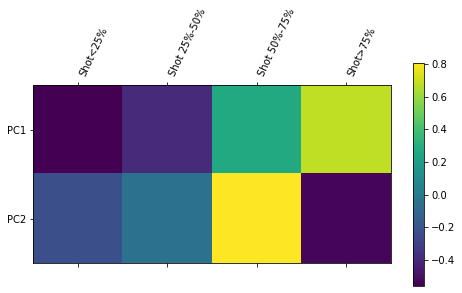

In [68]:
X = raw[['Shot<25%','Shot 25%-50%','Shot 50%-75%','Shot>75%']]
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['PC1','PC2'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X.columns)),X.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()#

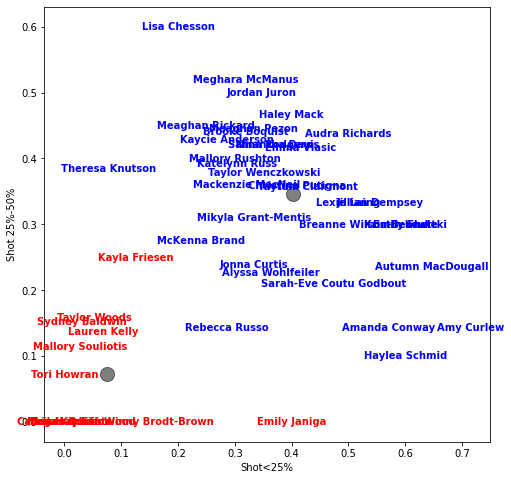

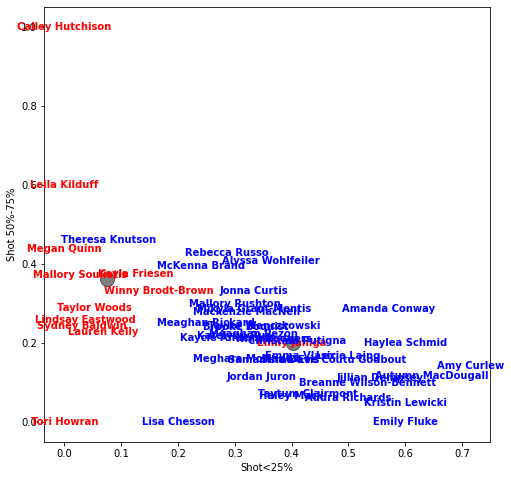

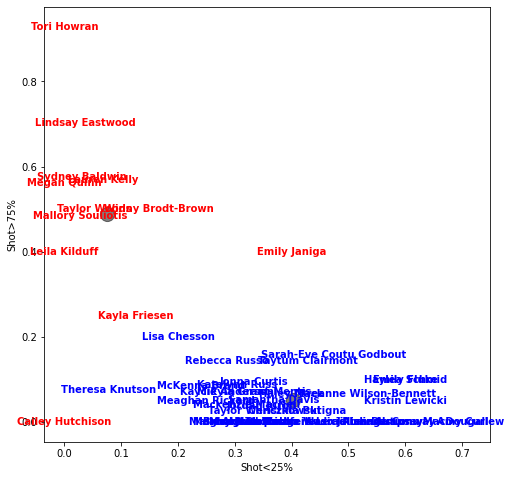

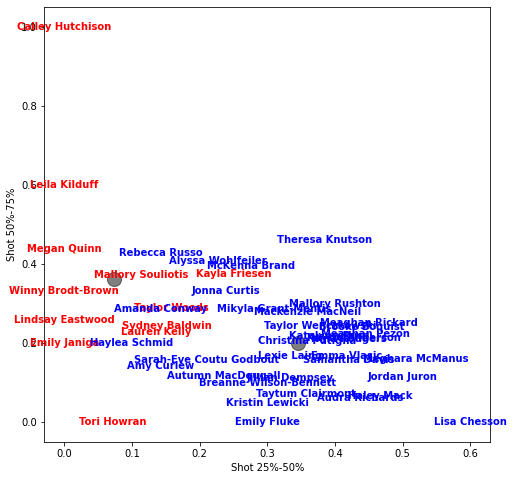

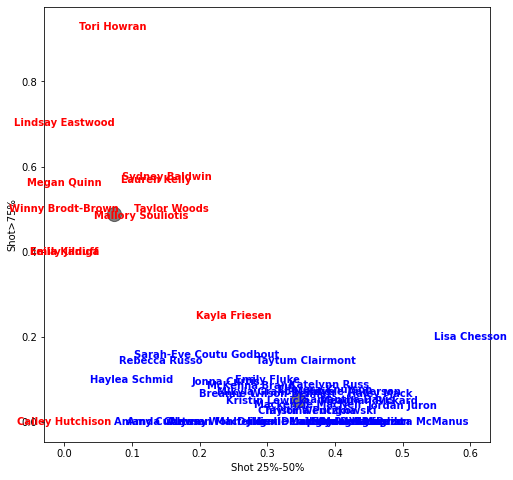

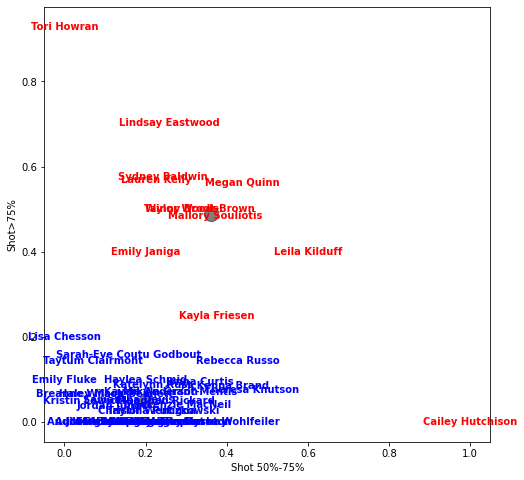

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
labels = ['Shot<25%','Shot 25%-50%','Shot 50%-75%','Shot>75%']
colors = ['blue','red']
centers = kmeans.cluster_centers_

for i in range(6):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Player'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [13]:
cluster_info=pd.DataFrame({'Player':raw['Player'],'Type':y})
cluster_info

,Player,Type
0,Leila Kilduff,1
1,Cailey Hutchison,1
2,Mikyla Grant-Mentis,0
3,Autumn MacDougall,0
4,Taylor Woods,1
5,Lisa Chesson,0
6,Katelynn Russ,0
7,Brooke Boquist,0
8,Emily Janiga,1
9,Samantha Davis,0


In [14]:
fulldata=pd.merge(raw,cluster_info, on='Player')
fulldata

,Unnamed: 0,Player,Shooting Percentage,Points per 60,Goal Contribution,Shot Contribution,Weighted Score,Goal<25%,Goal 25%-50%,Goal 50%-75%,Goal>75%,Shot<25%,Shot 25%-50%,Shot 50%-75%,Shot>75%,Type
0,0,Leila Kilduff,3.119426,3.676815,2.800621,-0.011485,0.490408,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.600000,0.400000,1
1,1,Cailey Hutchison,8.466656,1.509115,1.087196,-1.227110,0.489796,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
2,2,Mikyla Grant-Mentis,0.615565,3.676815,2.229479,1.760768,0.373985,0.800000,0.200000,0.000000,0.000000,0.333333,0.309524,0.285714,0.071429,0
3,3,Autumn MacDougall,1.127321,1.942655,4.514045,0.561165,0.340438,1.000000,0.000000,0.000000,0.000000,0.647059,0.235294,0.117647,0.000000,0
4,4,Taylor Woods,0.492717,2.809735,1.658338,1.447265,0.298722,0.500000,0.250000,0.000000,0.250000,0.052632,0.157895,0.289474,0.500000,1
5,5,Lisa Chesson,1.337016,1.509115,3.371762,0.142175,0.293146,1.000000,0.000000,0.000000,0.000000,0.200000,0.600000,0.000000,0.200000,0
6,6,Katelynn Russ,0.329567,2.231682,2.372264,1.347155,0.272095,1.000000,0.000000,0.000000,0.000000,0.304348,0.391304,0.217391,0.086957,0
7,7,Brooke Boquist,0.267570,2.231682,1.554494,1.623943,0.246766,1.000000,0.000000,0.000000,0.000000,0.320000,0.440000,0.240000,0.000000,0
8,8,Emily Janiga,1.337016,1.509115,1.087196,-0.011485,0.237551,0.000000,0.000000,0.000000,1.000000,0.400000,0.000000,0.200000,0.400000,1
9,9,Samantha Davis,0.492717,1.818787,1.554494,0.600334,0.236084,0.500000,0.250000,0.250000,0.000000,0.368421,0.421053,0.157895,0.052632,0


In [15]:
# rank type 0 players (long range shooters)
long_range_shooters=fulldata[fulldata['Type']==0].sort_values('Weighted Score',ascending=False)
long_range_shooters

,Unnamed: 0,Player,Shooting Percentage,Points per 60,Goal Contribution,Shot Contribution,Weighted Score,Goal<25%,Goal 25%-50%,Goal 50%-75%,Goal>75%,Shot<25%,Shot 25%-50%,Shot 50%-75%,Shot>75%,Type
2,2,Mikyla Grant-Mentis,0.615565,3.676815,2.229479,1.760768,0.373985,0.800000,0.200000,0.000000,0.0,0.333333,0.309524,0.285714,0.071429,0
3,3,Autumn MacDougall,1.127321,1.942655,4.514045,0.561165,0.340438,1.000000,0.000000,0.000000,0.0,0.647059,0.235294,0.117647,0.000000,0
5,5,Lisa Chesson,1.337016,1.509115,3.371762,0.142175,0.293146,1.000000,0.000000,0.000000,0.0,0.200000,0.600000,0.000000,0.200000,0
6,6,Katelynn Russ,0.329567,2.231682,2.372264,1.347155,0.272095,1.000000,0.000000,0.000000,0.0,0.304348,0.391304,0.217391,0.086957,0
7,7,Brooke Boquist,0.267570,2.231682,1.554494,1.623943,0.246766,1.000000,0.000000,0.000000,0.0,0.320000,0.440000,0.240000,0.000000,0
9,9,Samantha Davis,0.492717,1.818787,1.554494,0.600334,0.236084,0.500000,0.250000,0.250000,0.0,0.368421,0.421053,0.157895,0.052632,0
10,10,Haley Mack,0.742880,1.509115,1.554494,0.361959,0.225478,0.500000,0.500000,0.000000,0.0,0.400000,0.466667,0.066667,0.066667,0
11,11,Audra Richards,0.668613,1.509115,1.554494,0.488157,0.221706,0.500000,0.500000,0.000000,0.0,0.500000,0.437500,0.062500,0.000000,0
12,12,Rebecca Russo,0.827756,1.509115,1.087196,0.596327,0.214286,1.000000,0.000000,0.000000,0.0,0.285714,0.142857,0.428571,0.142857,0
13,13,Nina Rodgers,0.492717,1.509115,1.554494,0.866752,0.211972,0.500000,0.500000,0.000000,0.0,0.368421,0.421053,0.210526,0.000000,0


In [16]:
# rank type 0 players (short range shooters)
short_range_shooters=fulldata[fulldata['Type']==1].sort_values('Weighted Score',ascending=False)
short_range_shooters

,Unnamed: 0,Player,Shooting Percentage,Points per 60,Goal Contribution,Shot Contribution,Weighted Score,Goal<25%,Goal 25%-50%,Goal 50%-75%,Goal>75%,Shot<25%,Shot 25%-50%,Shot 50%-75%,Shot>75%,Type
0,0,Leila Kilduff,3.119426,3.676815,2.800621,-0.011485,0.490408,0.0,0.000000,0.500000,0.500000,0.000000,0.000000,0.600000,0.400000,1
1,1,Cailey Hutchison,8.466656,1.509115,1.087196,-1.227110,0.489796,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
4,4,Taylor Woods,0.492717,2.809735,1.658338,1.447265,0.298722,0.5,0.250000,0.000000,0.250000,0.052632,0.157895,0.289474,0.500000,1
8,8,Emily Janiga,1.337016,1.509115,1.087196,-0.011485,0.237551,0.0,0.000000,0.000000,1.000000,0.400000,0.000000,0.200000,0.400000,1
18,18,Mallory Souliotis,0.318496,1.199444,1.009313,0.432069,0.175421,0.0,0.333333,0.333333,0.333333,0.028571,0.114286,0.371429,0.485714,1
25,25,Winny Brodt-Brown,1.039948,0.425265,0.464133,-0.773826,0.144646,1.0,0.000000,0.000000,0.000000,0.166667,0.000000,0.333333,0.500000,1
27,27,Tori Howran,0.191181,0.786548,0.873018,0.220914,0.141282,0.0,0.000000,0.000000,1.000000,0.000000,0.071429,0.000000,0.928571,1
31,31,Kayla Friesen,-0.074058,0.786548,0.873018,1.472292,0.119748,0.0,0.000000,0.000000,1.000000,0.125000,0.250000,0.375000,0.250000,1
34,34,Lauren Kelly,-0.040301,0.580101,0.464133,0.936863,0.101765,0.0,0.500000,0.000000,0.500000,0.068182,0.136364,0.227273,0.568182,1
39,39,Megan Quinn,0.111609,0.208495,-0.055087,-0.277003,0.080404,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.437500,0.562500,1


# Team style analysis

In [ ]:
raw2.info()

In [ ]:
raw2.describe()

In [ ]:
# team style metrics: team goals, team shots, team skaters (Home/Away)

In [ ]:
hometeam_goal=raw2.groupby(['Home Team','game_id'])[['Home Team Goals','Away Team Goals']].max()
hometeam_goal=hometeam_goal.reset_index()
hometeam_goal=hometeam_goal.groupby('Home Team')[['Home Team Goals','Away Team Goals']].mean()
hometeam_goal=hometeam_goal.reset_index()
hometeam_goal

In [ ]:
hometeam_goal=raw2.groupby(['Home Team','game_id'])[['Home Team Goals','Away Team Goals']].max()
hometeam_goal=hometeam_goal.reset_index()
hometeam_goal=hometeam_goal.groupby('Home Team')[['Home Team Goals','Away Team Goals']].mean()
hometeam_goal=hometeam_goal.reset_index()

hometeam_skater=raw2.groupby('Home Team')[['Home Team Skaters','Away Team Skaters']].mean()
hometeam_skater=hometeam_skater.reset_index()

hometeam=pd.merge(hometeam_skater,hometeam_goal,on='Home Team')
hometeam=hometeam.rename(columns={'Home Team':'Team'})
hometeam=hometeam.rename(columns={'Home Team Skaters':'As Home Team: Skaters'})
hometeam=hometeam.rename(columns={'Away Team Skaters':'As Home Team: Opponents Skaters'})
hometeam=hometeam.rename(columns={'Home Team Goals':'As Home Team: Goals'})
hometeam=hometeam.rename(columns={'Away Team Goals':'As Home Team: Opponents Goals'})

hometeam

awayteam_goal=raw2.groupby(['Away Team','game_id'])[['Home Team Goals','Away Team Goals']].max()
awayteam_goal=awayteam_goal.reset_index()
awayteam_goal=awayteam_goal.groupby('Away Team')[['Home Team Goals','Away Team Goals']].mean()
awayteam_goal=awayteam_goal.reset_index()

awayteam_skater=raw2.groupby('Away Team')[['Home Team Skaters','Away Team Skaters']].mean()
awayteam_skater=awayteam_skater.reset_index()

awayteam=pd.merge(awayteam_skater,awayteam_goal,on='Away Team')
awayteam=awayteam.rename(columns={'Away Team':'Team'})
awayteam=awayteam.rename(columns={'Home Team Skaters':'As Away Team: Opponents Skaters'})
awayteam=awayteam.rename(columns={'Away Team Skaters':'As Away Team: Skaters'})
awayteam=awayteam.rename(columns={'Home Team Goals':'As Away Team: Opponents Goals'})
awayteam=awayteam.rename(columns={'Away Team Goals':'As Away Team: Goals'})

team=pd.merge(hometeam,awayteam,on='Team')
team

In [ ]:
team['Net Skater Scores (Home)']=team['As Home Team: Skaters']-team['As Home Team: Opponents Skaters']
team['Net Skater Scores (Away)']=team['As Away Team: Skaters']-team['As Away Team: Opponents Skaters']
team['Net Goal Scores (Home)']=team['As Home Team: Goals']-team['As Home Team: Opponents Goals']
team['Net Goal Scores (Away)']=team['As Away Team: Goals']-team['As Away Team: Opponents Goals']
team_lite=team[['Team','Net Skater Scores (Home)','Net Skater Scores (Away)','Net Goal Scores (Home)','Net Goal Scores (Away)']]
team_lite

In [ ]:
team_lite=team_lite.set_index('Team')
team_norm=(team_lite-team_lite.mean())/team_lite.std()
team_norm

In [ ]:
homeskaters1=raw2.groupby('Home Team')[['Home Team Skaters','Away Team Skaters']].sum()
homeskaters1=homeskaters1.rename(columns={'Home Team Skaters':'Skaters'})
homeskaters1=homeskaters1.rename(columns={'Away Team Skaters':'Opponents Skaters'})

homeskaters2=raw2.groupby('Home Team')[['Home Team Skaters','Away Team Skaters']].count()
homeskaters2=homeskaters2.rename(columns={'Home Team Skaters':'Skaters'})
homeskaters2=homeskaters2.rename(columns={'Away Team Skaters':'Opponents Skaters'})

awayskaters1=raw2.groupby('Away Team')[['Home Team Skaters','Away Team Skaters']].sum()
ayayskaters1=awayskaters1[['Away Team Skaters','Home Team Skaters']]
awayskaters1=awayskaters1.rename(columns={'Home Team Skaters':'Opponents Skaters'})
awayskaters1=awayskaters1.rename(columns={'Away Team Skaters':'Skaters'})

awayskaters2=raw2.groupby('Away Team')[['Home Team Skaters','Away Team Skaters']].count()
ayayskaters2=awayskaters2[['Away Team Skaters','Home Team Skaters']]
awayskaters2=awayskaters2.rename(columns={'Home Team Skaters':'Opponents Skaters'})
awayskaters2=awayskaters2.rename(columns={'Away Team Skaters':'Skaters'})

skaters=(homeskaters1+awayskaters1)/(homeskaters2+awayskaters2)
skaters

In [ ]:
hometeam_goal1=raw2.groupby(['Home Team','game_id'])[['Home Team Goals','Away Team Goals']].max()
hometeam_goal1=hometeam_goal1.reset_index()
hometeam_goal1=hometeam_goal1.groupby('Home Team')[['Home Team Goals','Away Team Goals']].sum()
hometeam_goal1=hometeam_goal1.rename(columns={'Home Team Goals':'Goals'})
hometeam_goal1=hometeam_goal1.rename(columns={'Away Team Goals':'Opponents Goals'})

hometeam_goal2=raw2.groupby(['Home Team','game_id'])[['Home Team Goals','Away Team Goals']].count()
hometeam_goal2=hometeam_goal2.reset_index()
hometeam_goal2=hometeam_goal2.groupby('Home Team')[['Home Team Goals','Away Team Goals']].count()
hometeam_goal2=hometeam_goal2.rename(columns={'Home Team Goals':'Goals'})
hometeam_goal2=hometeam_goal2.rename(columns={'Away Team Goals':'Opponents Goals'})

awayteam_goal1=raw2.groupby(['Away Team','game_id'])[['Home Team Goals','Away Team Goals']].max()
awayteam_goal1=awayteam_goal1.reset_index()
awayteam_goal1=awayteam_goal1.groupby('Away Team')[['Home Team Goals','Away Team Goals']].sum()
awayteam_goal1=awayteam_goal1[['Away Team Goals','Home Team Goals']]
awayteam_goal1=awayteam_goal1.rename(columns={'Away Team Goals':'Goals'})
awayteam_goal1=awayteam_goal1.rename(columns={'Home Team Goals':'Opponents Goals'})

awayteam_goal2=raw2.groupby(['Away Team','game_id'])[['Home Team Goals','Away Team Goals']].count()
awayteam_goal2=awayteam_goal2.reset_index()
awayteam_goal2=awayteam_goal2.groupby('Away Team')[['Home Team Goals','Away Team Goals']].count()
awayteam_goal2=awayteam_goal2[['Away Team Goals','Home Team Goals']]
awayteam_goal2=awayteam_goal2.rename(columns={'Away Team Goals':'Goals'})
awayteam_goal2=awayteam_goal2.rename(columns={'Home Team Goals':'Opponents Goals'})

avg_goal=(hometeam_goal1+awayteam_goal1)/(hometeam_goal2+awayteam_goal2)
avg_goal